# Solving 1-D Schrodinger Equation with quadratic potential
## Import required packages

In [1]:
from scipy import integrate
from scipy import sparse

import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML
plt.rc('savefig', dpi=300)

import numpy as np

# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

## Initial state

In [8]:
dx    = 0.002                     # spatial separation
x     = np.arange(0, 10, dx)       # spatial grid points

kx    = 50                        # wave number
m     = 1                          # mass
sigma = 0.5                        # width of initial gaussian wave-packet
x0    = 3.0                        # center of initial gaussian wave-packet

A = 1.0 / (sigma * np.sqrt(np.pi)) # normalization constant

# Initial Wavefunction
psi0 = np.sqrt(A) * np.exp(-(x-x0)**2 / (2.0 * sigma**2)) * np.exp(1j * kx * x)
print("Total Probability: ", np.sum(np.abs(psi0)**2)*dx)

Total Probability:  0.9999999999999998


In [4]:
1/dx

500.0

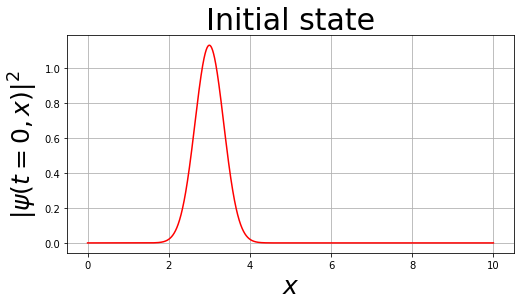

In [9]:
plt.figure(figsize=(8,4))

plt.plot(x, np.abs(psi0)**2, "r", label=r"$\vert\psi(t=0,x)\vert^2$")

plt.title('Initial state', fontsize=30)
plt.ylabel(r"$\vert\psi(t=0,x)\vert^2$", fontsize=25)
plt.xlabel('$x$', fontsize=25)
plt.grid()
plt.show()
# plt.savefig('', dpi=200)

# Potential V(x)

In [10]:
# Potential V(x)
V_hight = 1000

V = np.zeros(x.shape)
for i, _x in enumerate(x):
  if _x > 5:
    V[i] = V_hight

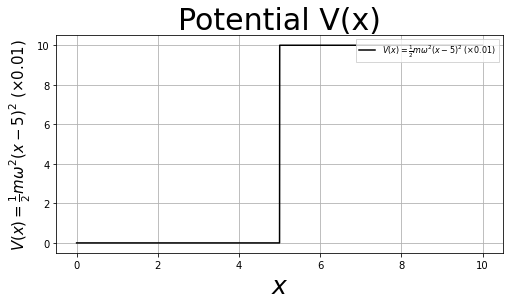

In [11]:
plt.figure(figsize=(8,4))

plt.plot(x, V*0.01, "k-", label=r"$V(x) = \frac{1}{2}m\omega^2 (x-5)^2$ ($\times0.01$)")

plt.title('Potential V(x)', fontsize=30)
plt.ylabel(r"$V(x) = \frac{1}{2}m\omega^2 (x-5)^2$ ($\times0.01$)", fontsize=15)
plt.xlabel('$x$', fontsize=25)
plt.grid()
plt.legend(loc=1, fontsize=8, fancybox=False)
plt.show()
# plt.savefig('', dpi=200)

# Both initial state and potential

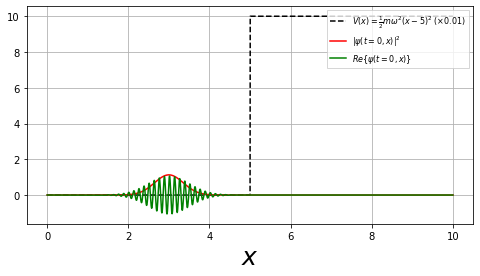

In [13]:
# Make a plot of psi0 and V 
plt.figure(figsize=(8,4))

plt.plot(x, V*0.01, "k--", label=r"$V(x) = \frac{1}{2}m\omega^2 (x-5)^2$ ($\times0.01$)")
plt.plot(x, np.abs(psi0)**2, "r", label=r"$\vert\psi(t=0,x)\vert^2$")
plt.plot(x, np.real(psi0), "g", label=r"$Re\{\psi(t=0,x)\}$")

plt.title('', fontsize=15)
plt.ylabel('', fontsize=15)
plt.xlabel('$x$', fontsize=25)
plt.grid()
plt.legend(loc=1, fontsize=8, fancybox=False)
plt.show()
# plt.savefig('', dpi=200)

## Laplace Operator (Finite Difference)

The 1-D Laplace operator $\nabla^2=\frac{\partial^2}{\partial x^2}$ can be expressed in terms of a banded matrix:

\begin{align}
\frac{\partial^2}{\partial x^2} y(x)
&= 
\frac{1}{dx} \left[ \frac{y_{n+1} - y_{n}}{dx} - \frac{y_{n} - y_{n-1}}{dx} \right]
\\
&=
\frac{y_{n+1} - 2 y_{n} + y_{n-1}}{(dx)^2} 
\\
&=
\frac{1}{(dx)^2}
\begin{pmatrix}
  -2  &  1  &  0  &  0 &  0 \\
   1  & -2  &  1  &  0 &  0 \\
   0  &  1  & -2  &  1 &  0 \\
   0  &  0  &  1  & -2 &  1 \\
   0  &  0  &  0  &  1 & -2 
\end{pmatrix}
\cdot
\begin{pmatrix}
   y_1   \\
   y_2   \\
   y_3   \\
   y_4   \\
   y_5  
\end{pmatrix}
\\
&\equiv
\mathbf{D2} \cdot \mathbf{y}
\end{align}

In [ ]:
dz = 0.02                     # spatial separation
z  = np.arange(0, 10, dz)       # spatial grid points

In [ ]:
# Laplace Operator (Finite Difference)
D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(z.size, z.size)) / dz**2

In [ ]:
D2.toarray()*dz**2

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

To test our $\mathbf{D2}$ operator, we can apply it on a $\sin(x)$ function to see if it gives us $\sin''(x)=-\sin(x)$

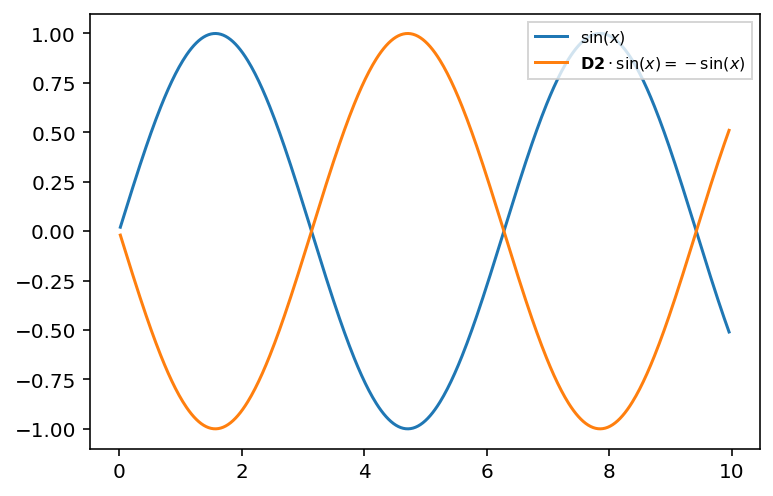

In [ ]:
# Check
plt.plot(z[1:-1], np.sin(z)[1:-1], label=r"$\sin(x)$")
plt.plot(z[1:-1], D2.dot(np.sin(z))[1:-1], label=r"$\mathbf{D2} \cdot \sin(x) = -\sin(x)$")
plt.legend(loc=1, fontsize=8, fancybox=False)
plt.show()

## Solve Schrodinger Equation

In [14]:
# Laplace Operator (Finite Difference)
D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2

In [15]:
D2.toarray()*dx**2

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

Original 1-D Schrodinger equation: $-\frac{\hbar^2}{2m}\nabla^2\psi + V \psi = i\hbar\frac{\partial}{\partial t}\psi$


=> $\text{psi_t} \equiv \frac{\partial}{\partial t}\psi(t,x) = -i\left[-\frac{\hbar}{2m}\nabla^2\psi(t,x) + \frac{1}{\hbar} V(x) \psi(t,x)\right]$

In [16]:
# RHS of Schrodinger Equation
hbar = 1
# hbar = 1.0545718176461565e-34
def psi_t(t, psi):
    return -1j * (- 0.5 * hbar / m * D2.dot(psi) + V / hbar * psi)

In [17]:
dt = 0.001  # time interval for snapshots
t0 = 0.0    # initial time
tf = 1.0    # final time
t_eval = np.arange(t0, tf, dt)  # recorded time shots

# Solve the Initial Value Problem
# dy / dt = f(t, y)
# y(t0) = y0
sol = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi0, t_eval = t_eval, method="RK23")

## Plotting

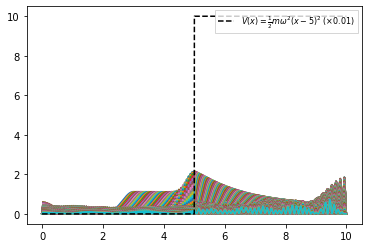

In [26]:
fig = plt.figure(figsize=(6, 4))
for i, t in enumerate(sol.t):
    plt.plot(x, np.abs(sol.y[:,i])**2)             # Plot Wavefunctions
#     print(np.sum(np.abs(sol.y[:,i])**2)*dx)        # Print Total Probability (Should = 1)

plt.plot(x, V * 0.01, "k--", label=r"$V(x) = \frac{1}{2}m\omega^2 (x-5)^2$ ($\times0.01$)")   # Plot Potential

plt.legend(loc=1, fontsize=8, fancybox=False)
# fig.savefig('')
plt.show()

## Animation

In [19]:
len(sol.t)

1000

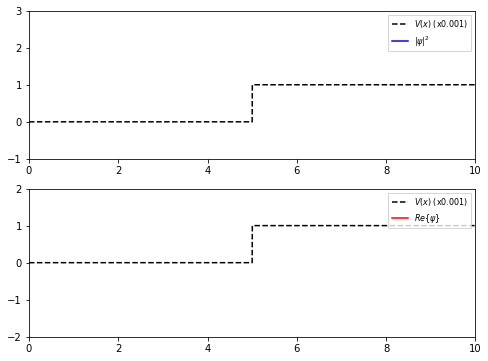

In [27]:
# Animation
fig = plt.figure(figsize=(8, 6))

ax1 = plt.subplot(2, 1, 1)
ax1.set_xlim(0, 10)
ax1.set_ylim(-1, 3)
title = ax1.set_title('')
line11, = ax1.plot([], [], "k--", label=r"$V(x)$ (x0.001)")
line12, = ax1.plot([], [], "b", label=r"$\vert \psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)

ax2 = plt.subplot(2, 1, 2)
ax2.set_xlim(0, 10)
ax2.set_ylim(-2, 2)
line21, = ax2.plot([], [], "k--", label=r"$V(x)$ (x0.001)")
line22, = ax2.plot([], [], "r", label=r"$Re\{ \psi \}$")
plt.legend(loc=1, fontsize=8, fancybox=False)


def init():
    line11.set_data(x, V * 0.001)
    line21.set_data(x, V * 0.001)
    return line11, line21


def animate(i):
    line12.set_data(x, np.abs(sol.y[:, i])**2)
    line22.set_data(x, np.real(sol.y[:, i]))
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line12, line22


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(sol.t), interval=200, blit=True)

In [28]:
# Save the animation into a short video
anim.save('abc_step.mp4', fps=15, extra_args=['-vcodec', 'libx264'], dpi=600)

In [ ]:
# Display the animation in the jupyter notebook
# HTML(anim.to_jshtml())

## Gaussian potential

In [34]:
def gV(y):
  return 1000*np.exp( -(y-7.5)**2 / (2*0.25**2) )

In [40]:
V = gV(x)

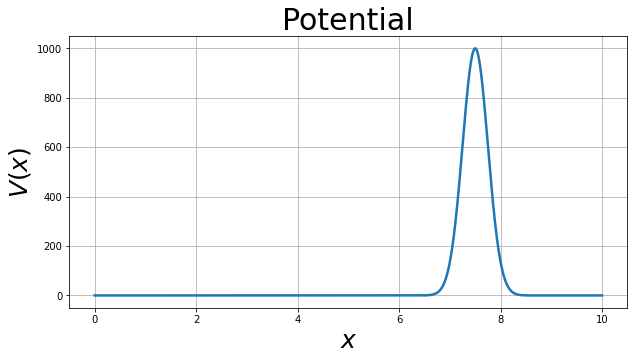

In [41]:
plt.figure(figsize=(10,5))
plt.plot(x, V, lw=2.5)
plt.title('Potential', fontsize=30)
plt.ylabel('$V(x)$', fontsize=25)
plt.xlabel('$x$', fontsize=25)
plt.grid()
plt.show()
# plt.savefig('', dpi=200)

## Solve Schrodinger Equation

In [37]:
# Laplace Operator (Finite Difference)
D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2

In [38]:
D2.toarray()*dx**2

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

Original 1-D Schrodinger equation: $-\frac{\hbar^2}{2m}\nabla^2\psi + V \psi = i\hbar\frac{\partial}{\partial t}\psi$


=> $\text{psi_t} \equiv \frac{\partial}{\partial t}\psi(t,x) = -i\left[-\frac{\hbar}{2m}\nabla^2\psi(t,x) + \frac{1}{\hbar} V(x) \psi(t,x)\right]$

In [42]:
# RHS of Schrodinger Equation
hbar = 1
# hbar = 1.0545718176461565e-34
def psi_t(t, psi):
    return -1j * (- 0.5 * hbar / m * D2.dot(psi) + V / hbar * psi)

In [43]:
dt = 0.001  # time interval for snapshots
t0 = 0.0    # initial time
tf = 1.0    # final time
t_eval = np.arange(t0, tf, dt)  # recorded time shots

# Solve the Initial Value Problem
# dy / dt = f(t, y)
# y(t0) = y0
sol = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi0, t_eval = t_eval, method="RK23")

## Plotting

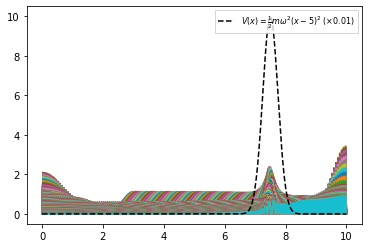

In [44]:
fig = plt.figure(figsize=(6, 4))
for i, t in enumerate(sol.t):
    plt.plot(x, np.abs(sol.y[:,i])**2)             # Plot Wavefunctions
#     print(np.sum(np.abs(sol.y[:,i])**2)*dx)        # Print Total Probability (Should = 1)

plt.plot(x, V*0.01, "k--", label=r"$V(x) = \frac{1}{2}m\omega^2 (x-5)^2$ ($\times0.01$)")   # Plot Potential

plt.legend(loc=1, fontsize=8, fancybox=False)
# fig.savefig('')
plt.show()

## Animation

In [45]:
len(sol.t)

1000

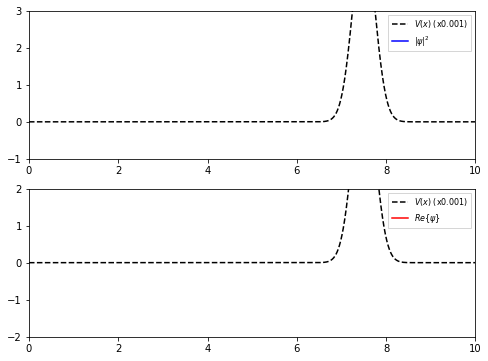

In [51]:
# Animation
fig = plt.figure(figsize=(8, 6))

ax1 = plt.subplot(2, 1, 1)
ax1.set_xlim(0, 10)
ax1.set_ylim(-1, 3)
title = ax1.set_title('')
line11, = ax1.plot([], [], "k--", label=r"$V(x)$ (x0.005)")
line12, = ax1.plot([], [], "b", label=r"$\vert \psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)

ax2 = plt.subplot(2, 1, 2)
ax2.set_xlim(0, 10)
ax2.set_ylim(-2, 2)
line21, = ax2.plot([], [], "k--", label=r"$V(x)$ (x0.005)")
line22, = ax2.plot([], [], "r", label=r"$Re\{ \psi \}$")
plt.legend(loc=1, fontsize=8, fancybox=False)


def init():
    line11.set_data(x, V * 0.005)
    line21.set_data(x, V * 0.005)
    return line11, line21


def animate(i):
    line12.set_data(x, np.abs(sol.y[:, i])**2)
    line22.set_data(x, np.real(sol.y[:, i]))
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line12, line22


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(sol.t), interval=200, blit=True)

In [52]:
# Save the animation into a short video
anim.save('abc_gaussian_V.mp4', fps=15, extra_args=['-vcodec', 'libx264'], dpi=600)